# Assignment 2: Plotting temperature over time, using data from a CSV file
## Author: Myles Henehan
*******

## Approach
In order to carry out this assignment, I will take the following steps:
1. Import the relevant libraries
2. Read in the data from CSV
3. Visualise the data using an appropriate plot type
4. Add some extra details such as labels and legends to make the data easier to read.

In [6]:
# Importing useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [20]:
# Reading in the csv file
import csv

timestamp = 'reportStartDateTime'
temp = 'dryBulbTemperature_Celsius'

with open('weatherreadings1.csv', 'r') as f:
    reader = csv.DictReader(f, delimiter=',')
    timevalues = [row[timestamp] for row in reader]
print(timevalues)

with open('weatherreadings1.csv', 'r') as f:
    reader = csv.DictReader(f, delimiter=',')
    temperatures = [row[temp] for row in reader]
print (temperatures)
    


['2024-10-02T16:15:00+00:00', '2024-10-02T16:45:00+00:00', '2024-10-02T17:00:00+00:00', '2024-10-02T17:15:00+00:00', '2024-10-02T17:30:00+00:00', '2024-10-02T17:45:00+00:00', '2024-10-02T18:00:00+00:00', '2024-10-02T18:15:00+00:00', '2024-10-02T18:30:00+00:00', '2024-10-02T18:45:00+00:00', '2024-10-02T19:00:00+00:00', '2024-10-02T19:15:00+00:00', '2024-10-02T19:30:00+00:00', '2024-10-02T19:45:00+00:00', '2024-10-02T20:00:00+00:00', '2024-10-02T20:15:00+00:00', '2024-10-02T20:30:00+00:00', '2024-10-02T20:45:00+00:00', '2024-10-02T21:00:00+00:00', '2024-10-02T21:15:00+00:00', '2024-10-02T21:30:00+00:00', '2024-10-02T21:45:00+00:00', '2024-10-02T22:00:00+00:00', '2024-10-02T22:15:00+00:00', '2024-10-02T22:30:00+00:00', '2024-10-02T22:45:00+00:00', '2024-10-02T23:00:00+00:00', '2024-10-02T23:15:00+00:00', '2024-10-02T23:30:00+00:00', '2024-10-02T23:45:00+00:00', '2024-10-03T00:00:00+00:00', '2024-10-03T00:15:00+00:00', '2024-10-03T00:30:00+00:00', '2024-10-03T00:45:00+00:00', '2024-10-03T0

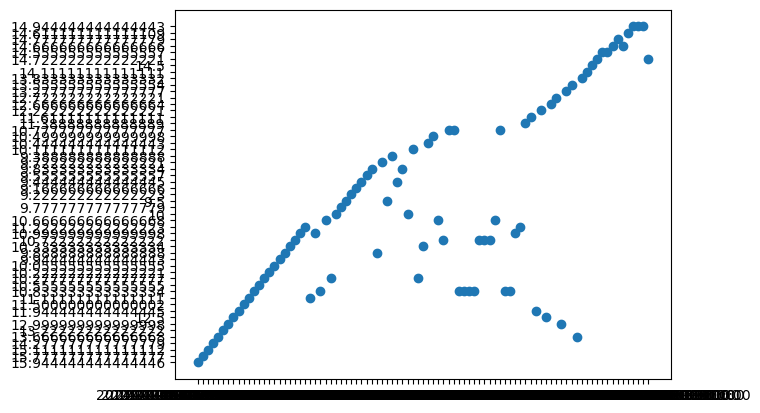

In [23]:
#Plotting our 2 lists against each other

fig, ax = plt.subplots()
ax.scatter(timevalues, temperatures)